# Income classification  💰

____________

# Data Set: IncomeEvaluation
## Overview:
### It contains 14 input features (e.g: `age`, `workclass`, `hours-per-week`, etc ), and 1 target feature (`income`)
### Check Data Set Guide for more information about the features

# target 🛑
 Analyze the dataset and develop classification models that predicts a given person income (whether >= 50K or < 50k) based on some input features using four different machine learning algorithms: K-Nearest Neighbors (KNN), Decision Tree, Naive Bayes, and Support Vector Machine (SVM).

1. Compare the performance of the four algorithms (KNN, Naive Bayes, SVM, and Decision Tree) based on the evaluation 
metrics obtained. 
2. Discuss the strengths and weaknesses of each algorithm in the context of your dataset. 
3. Provide insights into which algorithm performs better in achieving the prediction objective. 
_______

In [1]:
import numpy as np            
import pandas as pd            
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,GridSearchCV , cross_val_score ,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier ,plot_tree
from sklearn.preprocessing import StandardScaler , LabelEncoder ,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.metrics import accuracy_score  ,mean_squared_error  ,  confusion_matrix  ,  r2_score ,classification_report, roc_curve, auc ,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB ,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,LinearSVC
import json
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

# Prepare the Data
handling the names of the columns 

In [2]:
path = "income_evaluation.csv"
df = pd.read_csv(path)
pd.set_option('display.max_columns',len(df.columns))
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df['total_gain'] = df['capital-gain']-df['capital-loss']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,sex,capital-gain,capital-loss,hours-per-week,native-country,income,total_gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,...,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,...,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,...,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,...,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,...,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,...,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,...,Male,0,0,40,United-States,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,...,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,...,Male,0,0,20,United-States,<=50K,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
 15  total_gain      32561 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [4]:
df.describe(include="all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,sex,capital-gain,capital-loss,hours-per-week,native-country,income,total_gain
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,...,32561,32561.000000,32561.000000,32561.000000,32561,32561,32561.000000
unique,NaN,9,NaN,16,NaN,7,15,...,2,NaN,NaN,NaN,42,2,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,...,Male,NaN,NaN,NaN,United-States,<=50K,NaN
freq,NaN,22696,NaN,10501,NaN,14976,4140,...,21790,NaN,NaN,NaN,29170,24720,NaN
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,...,NaN,1077.648844,87.303830,40.437456,NaN,NaN,990.345014
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,...,NaN,7385.292085,402.960219,12.347429,NaN,NaN,7408.986951
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,...,NaN,0.000000,0.000000,1.000000,NaN,NaN,-4356.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,...,NaN,0.000000,0.000000,40.000000,NaN,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,...,NaN,0.000000,0.000000,40.000000,NaN,NaN,0.000000
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,...,NaN,0.000000,0.000000,45.000000,NaN,NaN,0.000000


In [5]:
df.isna().sum().to_frame()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,sex,capital-gain,capital-loss,hours-per-week,native-country,income,total_gain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,...,Male,2174,0,40,United-States,<=50K,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,...,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,...,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,...,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,...,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,...,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,...,Male,0,0,40,United-States,>50K,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,...,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,...,Male,0,0,20,United-States,<=50K,0


🗝️<br>
almost there are no duplicates in our dataset

# Understanding Categorical Features 🤔

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}","\n")

workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

sex: [' Male' ' Female'] 

native-country: [' United-States' ' Cuba'

# some cleaning 🚚

In [9]:
df_cleaned =df.copy()
print(f"Number of rows before dropping: {df_cleaned.shape[0]}")
df_cleaned = df_cleaned[df_cleaned['workclass'] != ' ?']

print(f"Number of rows after dropping: {df_cleaned.shape[0]}")

Number of rows before dropping: 32537
Number of rows after dropping: 30701


In [10]:
print(f"Number of rows before dropping: {df_cleaned.shape[0]}")
df_cleaned = df_cleaned[df_cleaned['native-country'] != ' ?']
print(f"Number of rows after dropping: {df_cleaned.shape[0]}")

Number of rows before dropping: 30701
Number of rows after dropping: 30146


# Analyzing Distributions

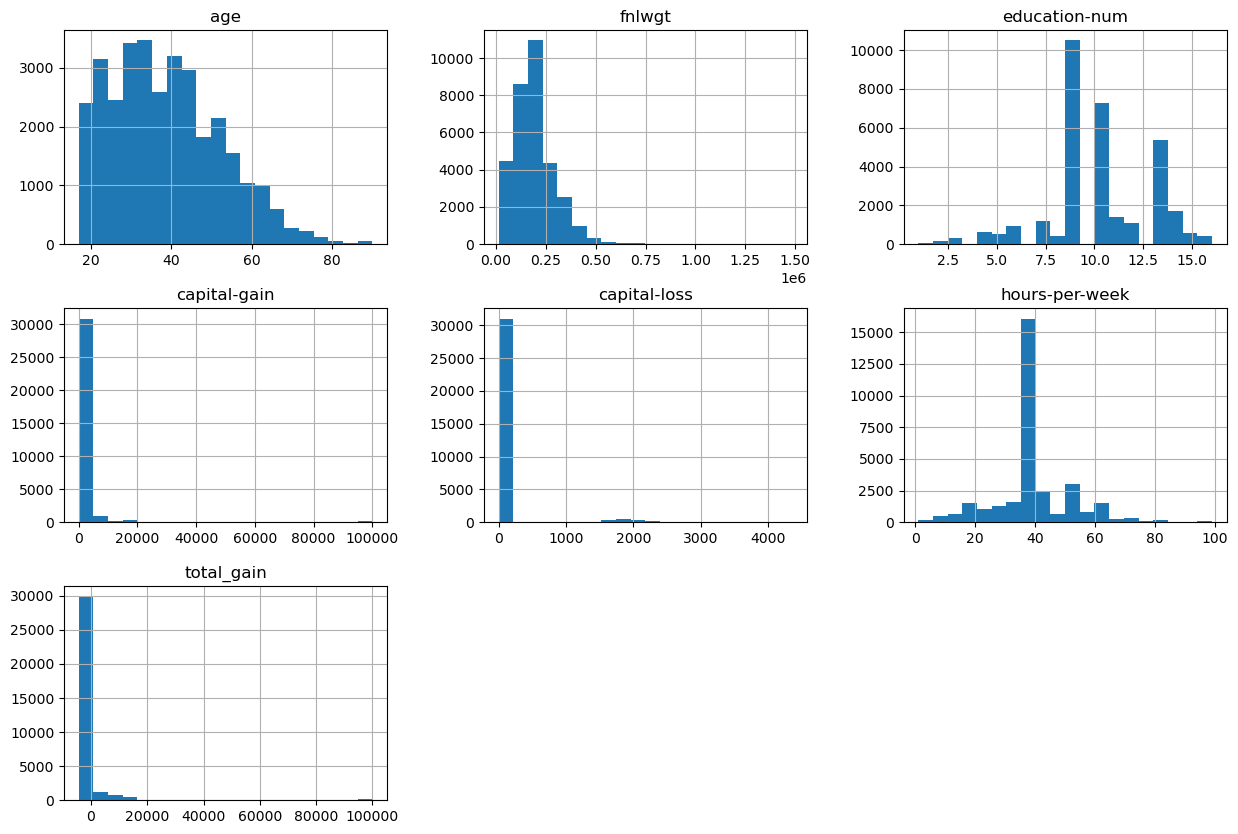

total_gain
 0        26181
 15024      337
 7688       270
 7298       240
-1902       194
          ...  
-1844         1
 2538         1
-2282         1
 2993         1
 1086         1
Name: count, Length: 207, dtype: int64


In [11]:
continuous_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week','total_gain']
df[continuous_cols].hist(figsize=(15, 10), bins=20)
plt.show()
print(df_cleaned['total_gain'].value_counts())

🗝️<br>
**Age**  : The population is mostly young to middle-aged individuals, with fewer people in older age groups.<br>
**fnlwgt**: The distribution is heavily skewed toward lower values, indicating that most individuals in the dataset contribute less to weighted statistics, while a smaller group with high fnlwgt values disproportionately impacts the analysis.

_____

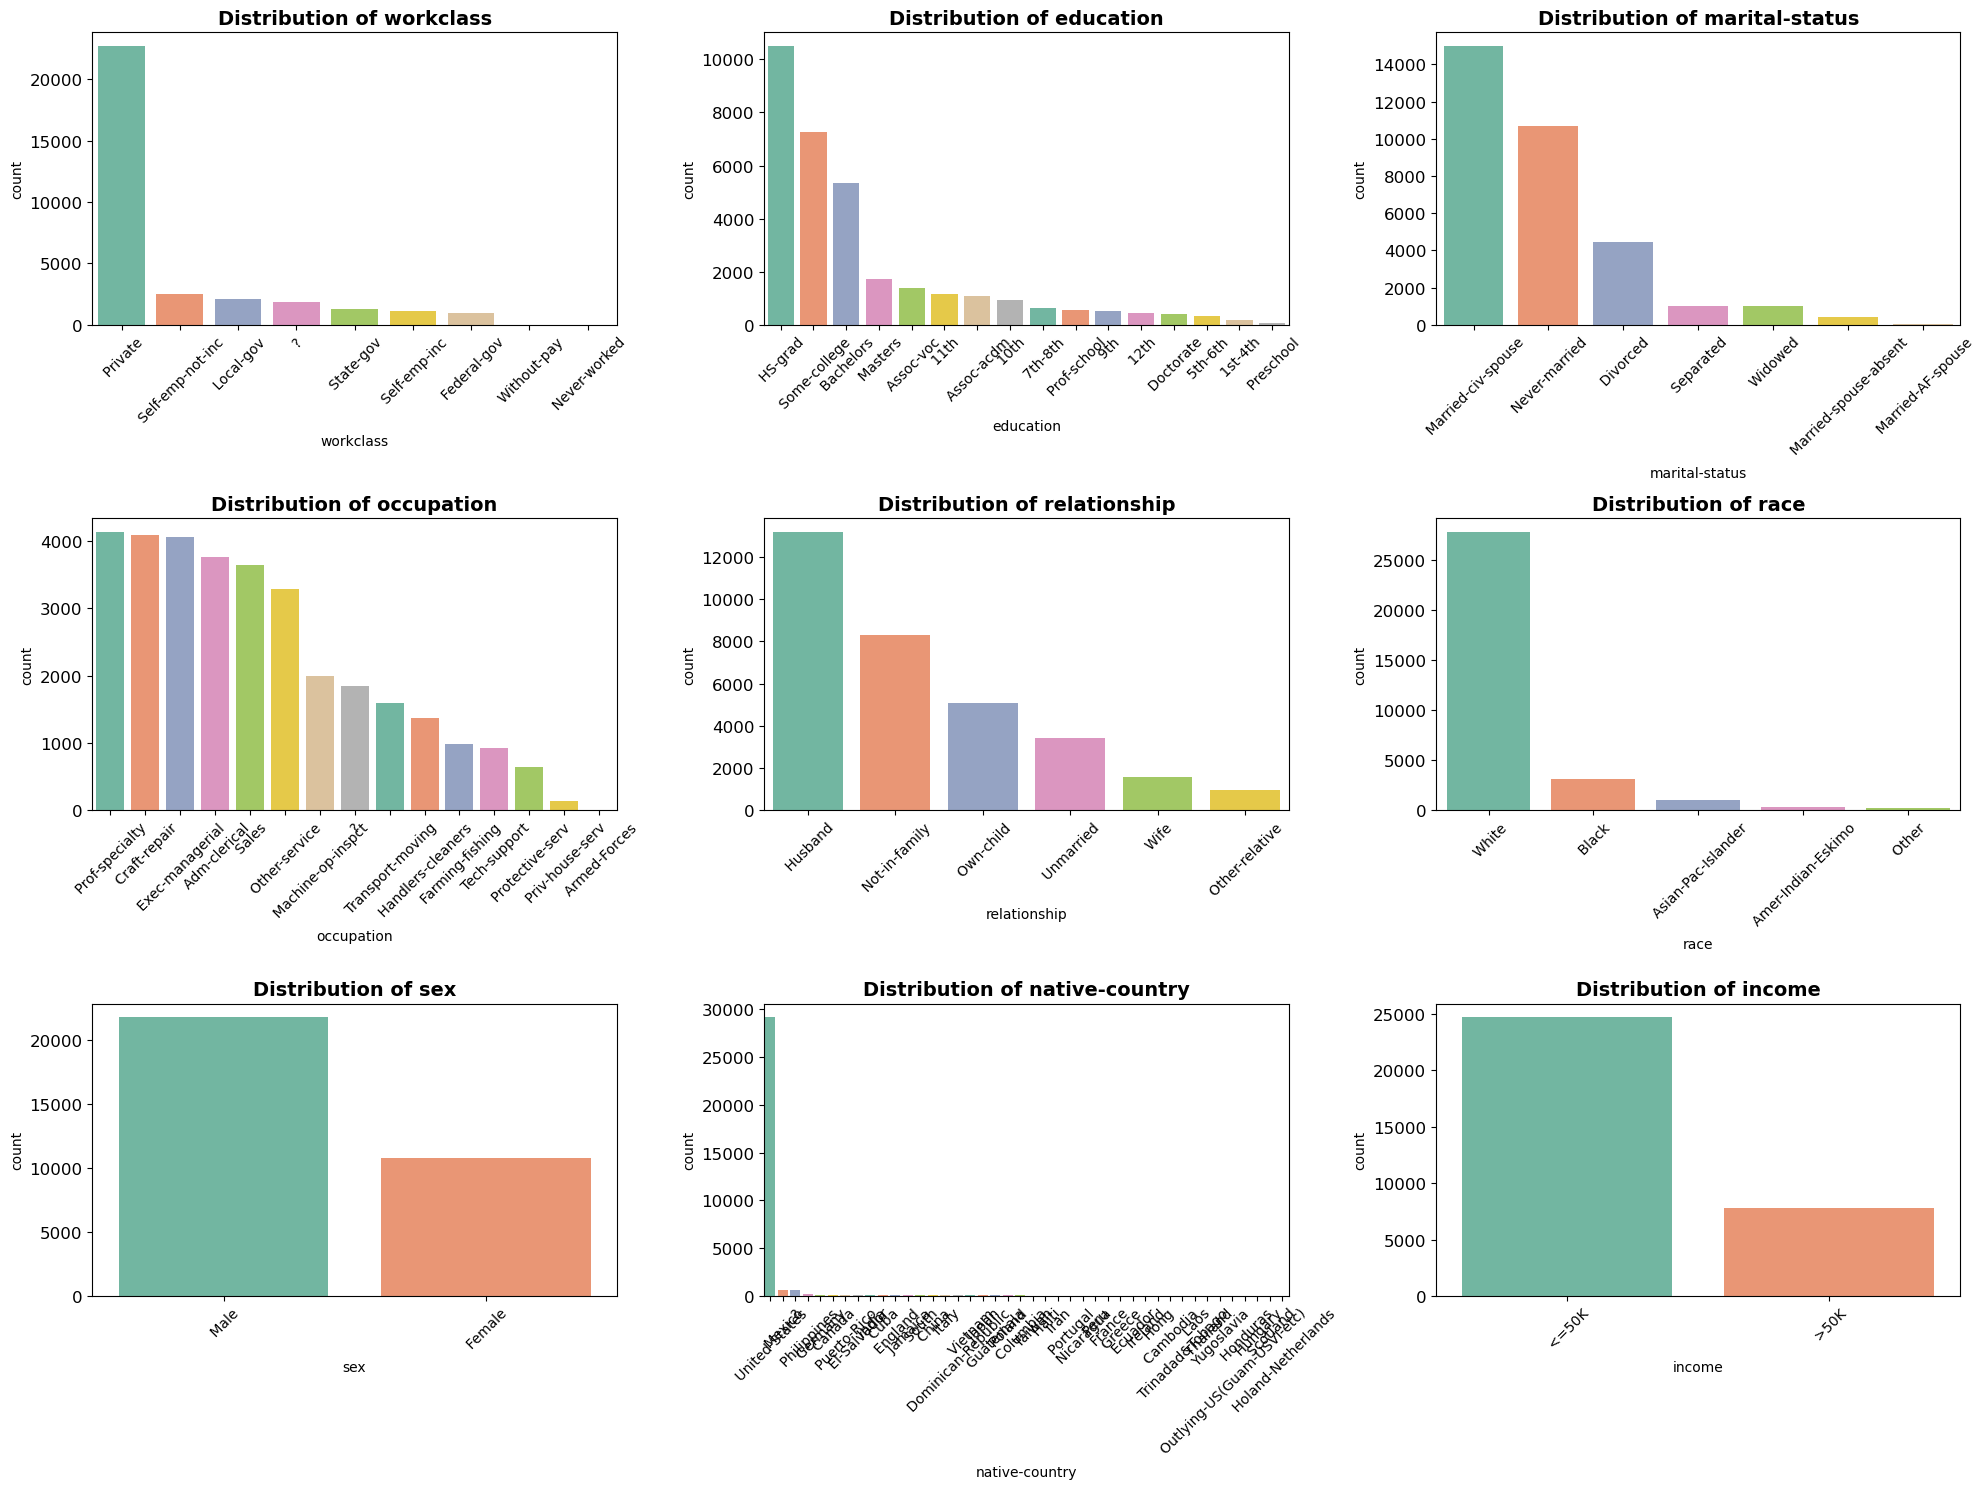

In [12]:
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

palette = 'Set2'  

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i], palette=palette)
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelsize=12)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Analyzing Relationships

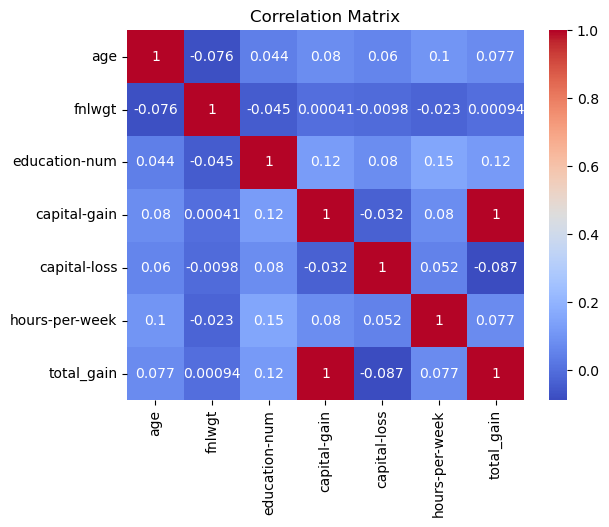

In [13]:
corr_matrix = df_cleaned[continuous_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**No Multicollinearity**:
Since there is no strong correlation between the continuous variables, this is a positive aspect for any modeling tasks you might perform, as it suggests there isn't severe multicollinearity. Multicollinearity can distort regression results because it makes it harder to determine the individual effect of each feature.
The absence of high correlation reduces the risk of overfitting due to redundant information.

In [14]:
from tabulate import tabulate

result = df_cleaned.groupby('income')[continuous_cols].mean()

print(tabulate(result, headers='keys', tablefmt='pretty', showindex=True))

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
| income |        age         |       fnlwgt       |   education-num    |    capital-gain    |    capital-loss    |  hours-per-week   |     total_gain     |
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
| <=50K  | 36.60662544169611  | 190353.16855123674 | 9.629549469964664  | 148.98590989399293 | 53.48105123674912  | 39.34863074204947 | 95.50485865724382  |
|  >50K  | 43.960165201172394 | 188145.28097521982 | 11.606981081801226 | 3938.729016786571  | 193.80229150013324 |  45.707034372502  | 3744.9267252864374 |
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+


In [15]:
for col in categorical_cols:
    print(df_cleaned.groupby('income')[col].value_counts(normalize=True),"\n")

income  workclass        
 <=50K   Private             0.768110
         Self-emp-not-inc    0.078799
         Local-gov           0.064399
         State-gov           0.041299
         Federal-gov         0.025530
         Self-emp-inc        0.020936
         Without-pay         0.000618
         Never-worked        0.000309
 >50K    Private             0.649347
         Self-emp-not-inc    0.095124
         Local-gov           0.081135
         Self-emp-inc        0.079936
         Federal-gov         0.048628
         State-gov           0.045830
Name: proportion, dtype: float64 

income  education    
 <=50K   HS-grad         0.363030
         Some-college    0.235689
         Bachelors       0.128799
         11th            0.043728
         Assoc-voc       0.042535
         10th            0.033701
         Assoc-acdm      0.033216
         Masters         0.031272
         7th-8th         0.023057
         9th             0.018993
         12th            0.015371
         5t

# Encoding Categorical Variables

In [16]:
le = LabelEncoder()

for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    
df_cleaned    

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,sex,capital-gain,capital-loss,hours-per-week,native-country,income,total_gain
0,39,6,77516,9,13,4,1,...,1,2174,0,40,38,0,2174
1,50,5,83311,9,13,2,4,...,1,0,0,13,38,0,0
2,38,3,215646,11,9,0,6,...,1,0,0,40,38,0,0
3,53,3,234721,1,7,2,6,...,1,0,0,40,38,0,0
4,28,3,338409,9,13,2,10,...,0,0,0,40,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,13,...,0,0,0,38,38,0,0
32557,40,3,154374,11,9,2,7,...,1,0,0,40,38,1,0
32558,58,3,151910,11,9,6,1,...,0,0,0,40,38,0,0
32559,22,3,201490,11,9,4,1,...,1,0,0,20,38,0,0


# Detect Outliers 🗺️

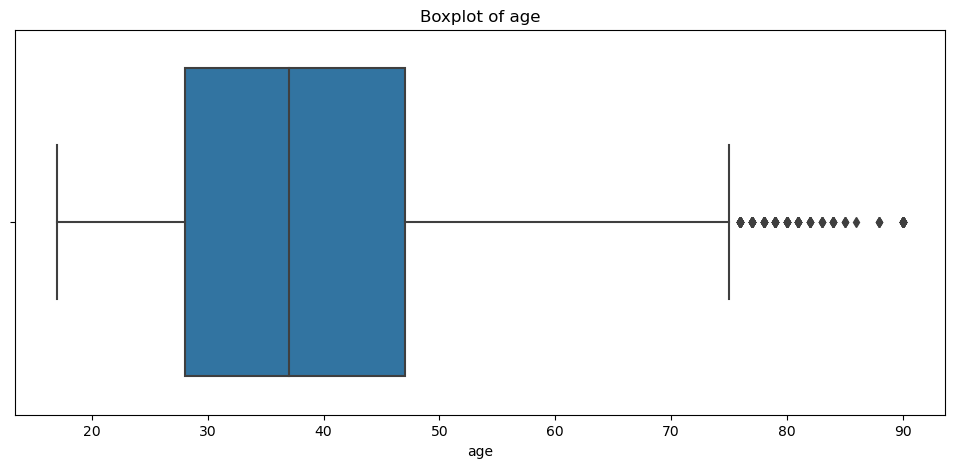

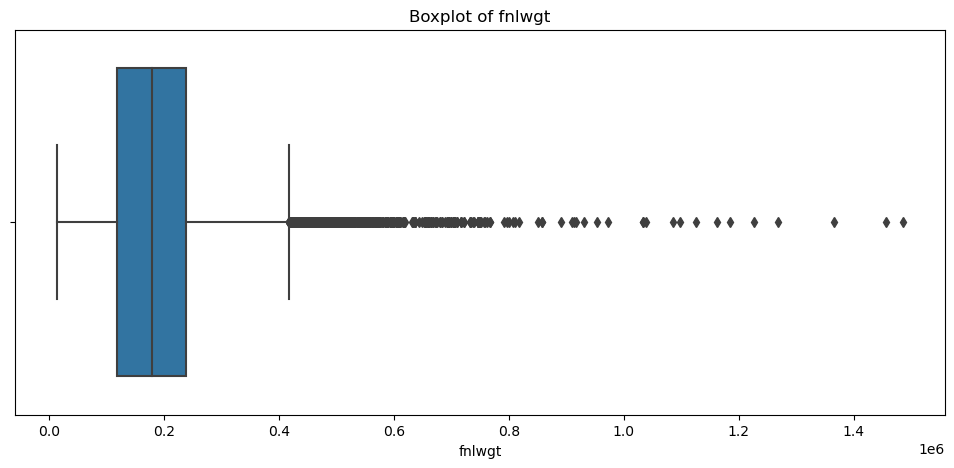

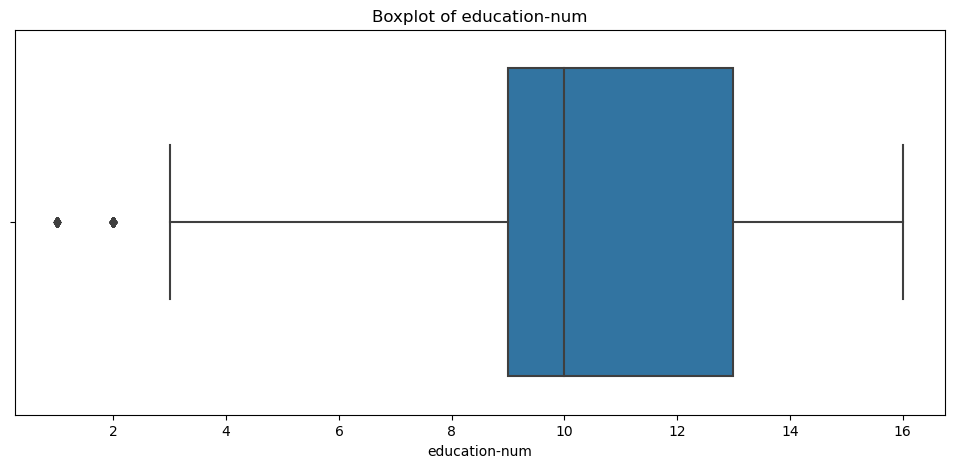

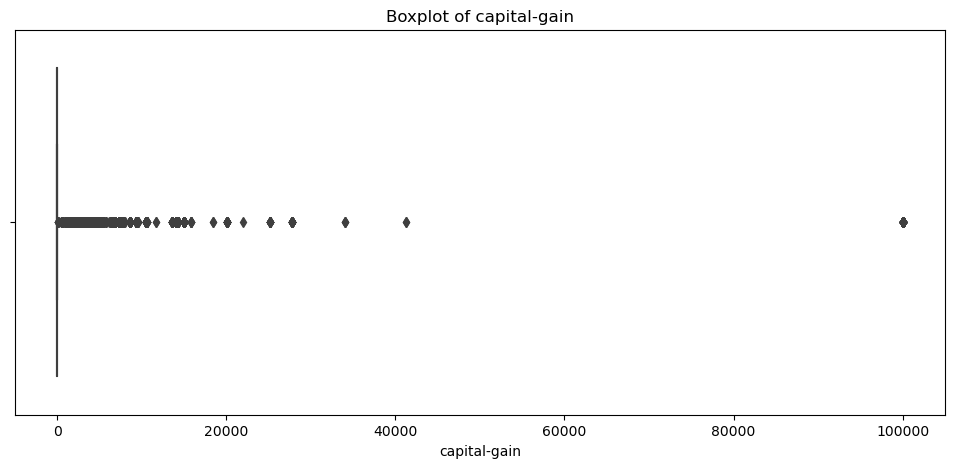

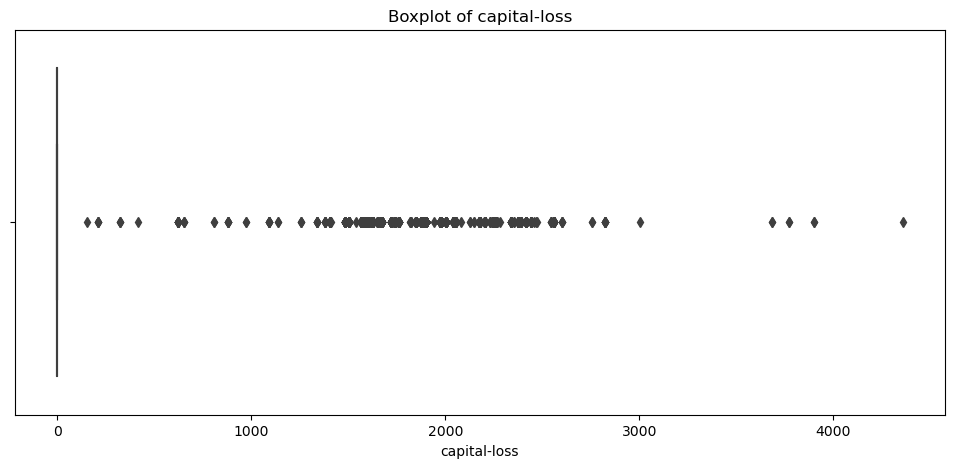

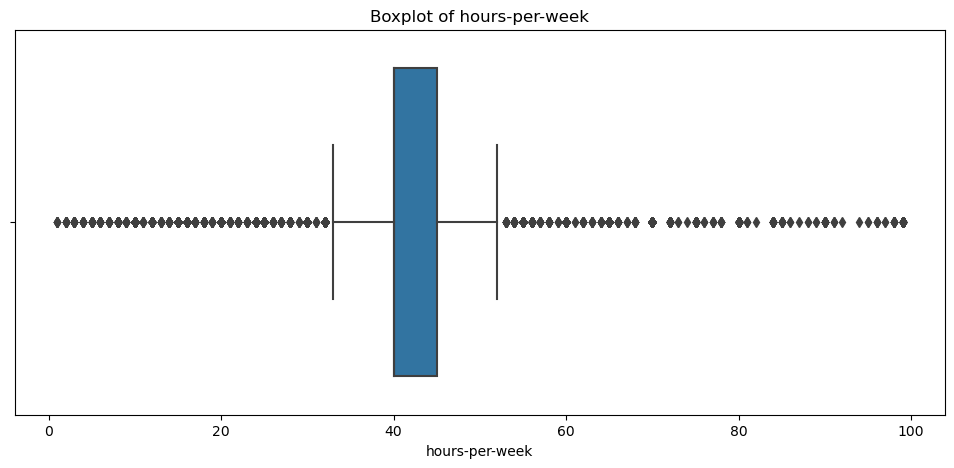

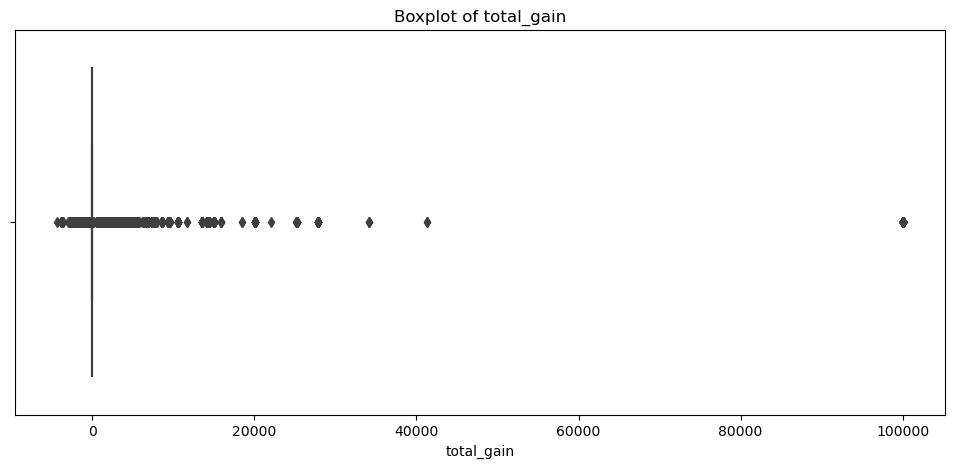

In [17]:
for col in continuous_cols:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Using the IQR Method

In [18]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  
    Q3 = data[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

for col in continuous_cols:
    outliers = detect_outliers_iqr(df_cleaned, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in age: 168
Number of outliers in fnlwgt: 905
Number of outliers in education-num: 193
Number of outliers in capital-gain: 2538
Number of outliers in capital-loss: 1427
Number of outliers in hours-per-week: 7950
Number of outliers in total_gain: 3965


# Handle Outliers

In [19]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in continuous_cols:
    df = remove_outliers_iqr(df_cleaned, col)

print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (26181, 16)


# Verify Outlier Handling
After handling outliers, replot boxplots to confirm their removal or capping.

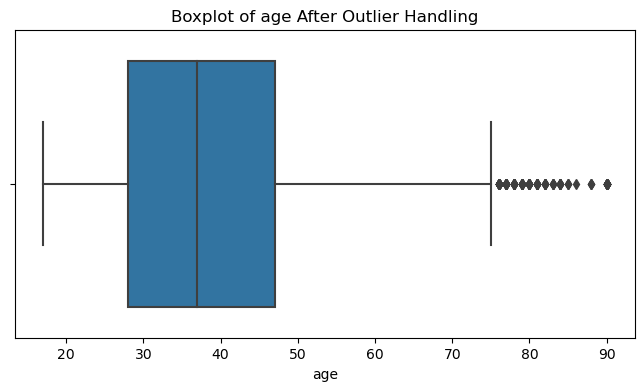

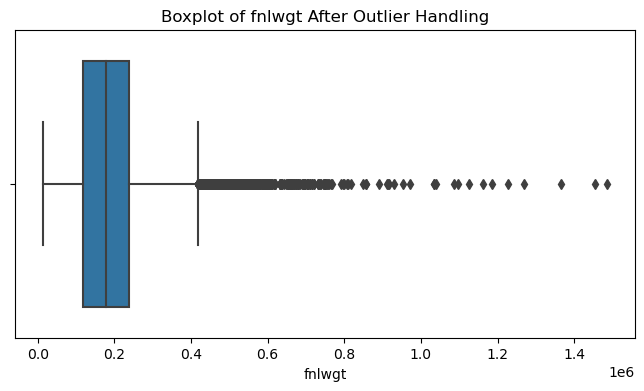

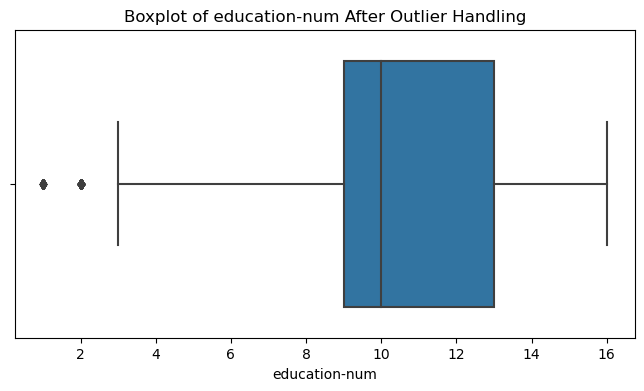

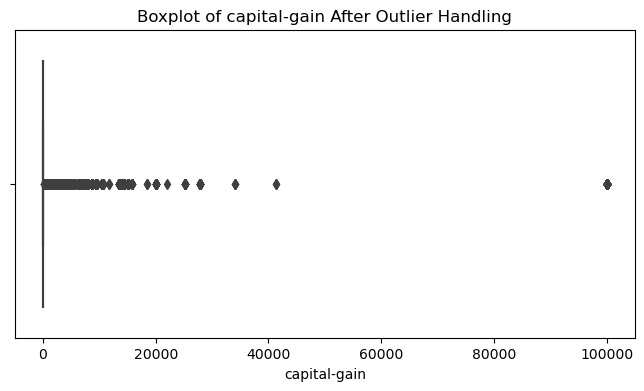

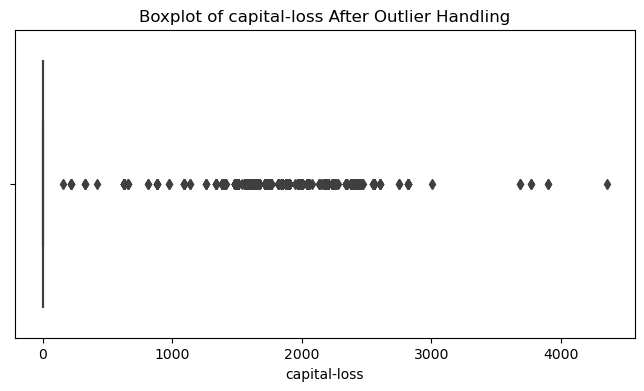

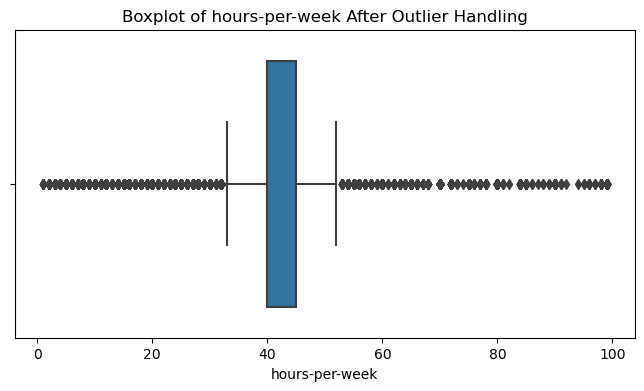

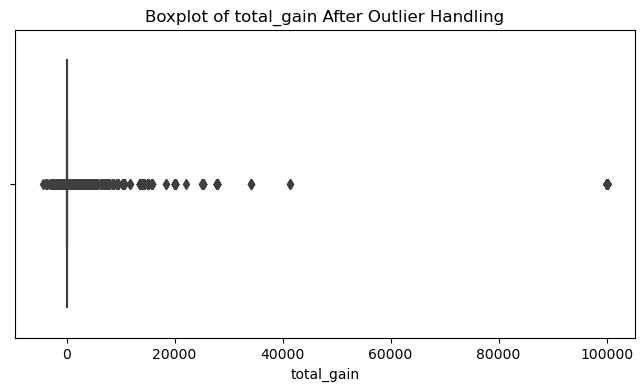

In [20]:
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f"Boxplot of {col} After Outlier Handling")
    plt.show()

_________________
____________

# Feature Scaling
Standardize continuous variables to bring them to the same scale.

In [21]:
scaler = StandardScaler()
df_cleaned[continuous_cols] = scaler.fit_transform(df_cleaned[continuous_cols])
df_cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,...,sex,capital-gain,capital-loss,hours-per-week,native-country,income,total_gain
0,0.042827,6,-1.062754,9,1.129135,4,1,...,1,0.145976,-0.218647,-0.077776,38,0,0.157401
1,0.880433,5,-1.007906,9,1.129135,2,4,...,1,-0.147485,-0.218647,-2.331420,38,0,-0.135111
2,-0.033319,3,0.244589,11,-0.440147,0,6,...,1,-0.147485,-0.218647,-0.077776,38,0,-0.135111
3,1.108871,3,0.425126,1,-1.224788,2,6,...,1,-0.147485,-0.218647,-0.077776,38,0,-0.135111
4,-0.794779,3,1.406490,9,1.129135,2,10,...,0,-0.147485,-0.218647,-0.077776,4,0,-0.135111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.870925,3,0.638846,7,0.736814,2,13,...,0,-0.147485,-0.218647,-0.244712,38,0,-0.135111
32557,0.118973,3,-0.335325,11,-0.440147,2,7,...,1,-0.147485,-0.218647,-0.077776,38,1,-0.135111
32558,1.489601,3,-0.358646,11,-0.440147,6,1,...,0,-0.147485,-0.218647,-0.077776,38,0,-0.135111
32559,-1.251655,3,0.110609,11,-0.440147,4,1,...,1,-0.147485,-0.218647,-1.747142,38,0,-0.135111


# Models 🚀

# 1- KNN 

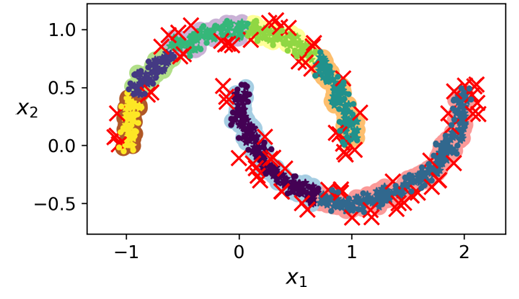

Implement the KNN algorithm with different k values

In [22]:
results = {}
df_cleaned = df_cleaned.sample(n=500, random_state=42)

X = df_cleaned.drop(['income', 'total_gain'], axis=1)
y = df_cleaned['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:
acur = []
for i in range(1,100,3): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    acur.append(accuracy)
    
    print(f"Accuracy of KNN with k={i}: {accuracy}")    

Accuracy of KNN with k=1: 0.752
Accuracy of KNN with k=4: 0.776
Accuracy of KNN with k=7: 0.776
Accuracy of KNN with k=10: 0.8
Accuracy of KNN with k=13: 0.8
Accuracy of KNN with k=16: 0.8
Accuracy of KNN with k=19: 0.824
Accuracy of KNN with k=22: 0.792
Accuracy of KNN with k=25: 0.784
Accuracy of KNN with k=28: 0.776
Accuracy of KNN with k=31: 0.736
Accuracy of KNN with k=34: 0.736
Accuracy of KNN with k=37: 0.736
Accuracy of KNN with k=40: 0.712
Accuracy of KNN with k=43: 0.736
Accuracy of KNN with k=46: 0.736
Accuracy of KNN with k=49: 0.72
Accuracy of KNN with k=52: 0.72
Accuracy of KNN with k=55: 0.72
Accuracy of KNN with k=58: 0.72
Accuracy of KNN with k=61: 0.704
Accuracy of KNN with k=64: 0.72
Accuracy of KNN with k=67: 0.72
Accuracy of KNN with k=70: 0.72
Accuracy of KNN with k=73: 0.712
Accuracy of KNN with k=76: 0.712
Accuracy of KNN with k=79: 0.712
Accuracy of KNN with k=82: 0.712
Accuracy of KNN with k=85: 0.712
Accuracy of KNN with k=88: 0.712
Accuracy of KNN with k=91:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


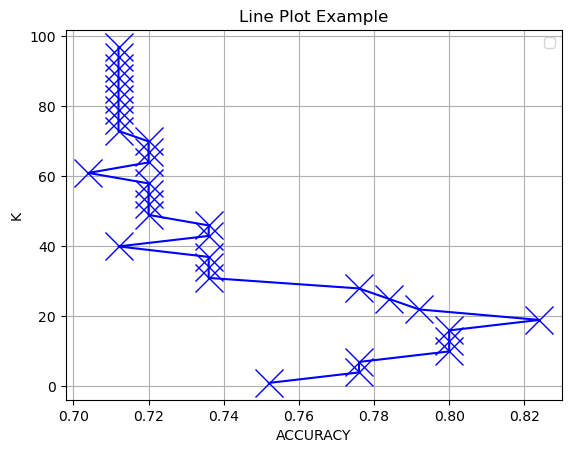

In [24]:
t =  range(1,100,3)
plt.plot(acur, t, marker='x', linestyle='-', color='b',ms=20)

plt.title("Line Plot Example")
plt.xlabel("ACCURACY")
plt.ylabel("K")

plt.legend()

plt.grid(True)

plt.show()

In [25]:
y_pred = knn.predict(X_test)
for item in y_pred:
    if item ==0 :
        print("income : <=50")
    else :
        print("income : >50")
    

income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income

# The range of **K** from 4 to 15 is the best choice of our **model** 

In [26]:
k = 20  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.7920
Confusion Matrix:
[[84  5]
 [21 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87        89
           1       0.75      0.42      0.54        36

    accuracy                           0.79       125
   macro avg       0.78      0.68      0.70       125
weighted avg       0.79      0.79      0.77       125



In [27]:
X_train = np.asarray(X_train, order='C')  
X_test = np.asarray(X_test, order='C')   

metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine', 'chebyshev']

# Store accuracy results for each metric
accuracy_results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    

    accuracy_results[metric] = accuracy
    
    print(f"Accuracy with {metric} distance: {accuracy:.4f}")

Accuracy with euclidean distance: 0.7520
Accuracy with manhattan distance: 0.7680
Accuracy with minkowski distance: 0.7520
Accuracy with cosine distance: 0.7600
Accuracy with chebyshev distance: 0.7280


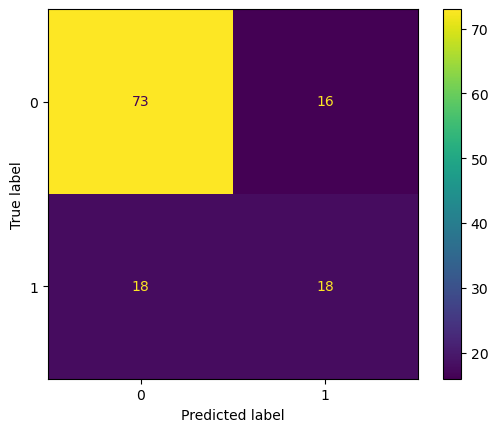

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

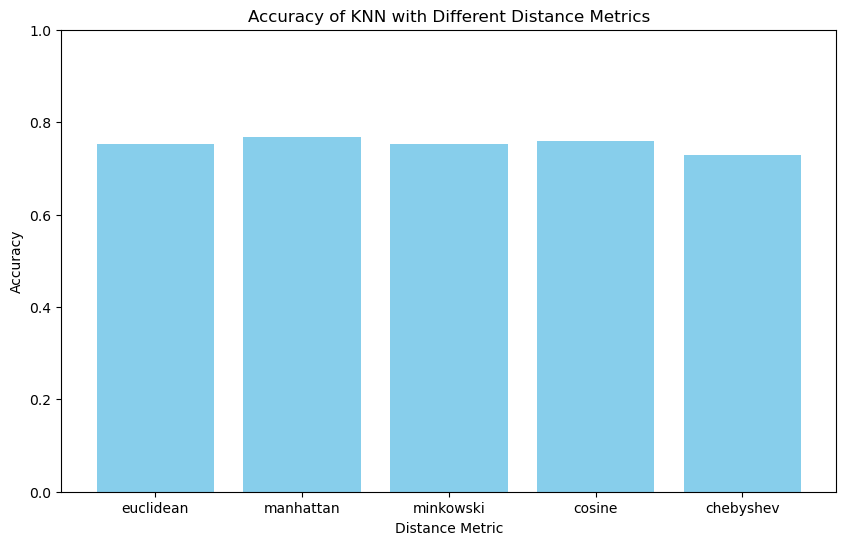

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN with Different Distance Metrics')
plt.ylim([0, 1]) 
plt.show() 

# almost the same in the accuracy 🧮
_____________
____________
# grid_search

In [30]:
result = {}

param_grid_knn = {
    'n_neighbors': range(1, 21),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

best_params = grid_search_knn.best_params_
best_score = grid_search_knn.best_score_

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

result['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Classification Report': classification_report(y_test, y_pred_knn, output_dict=True),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_knn)
}

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix:\n{cm}")

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.7973
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88        89
           1       0.84      0.44      0.58        36

    accuracy                           0.82       125
   macro avg       0.83      0.71      0.73       125
weighted avg       0.82      0.82      0.80       125

Confusion Matrix:
[[86  3]
 [20 16]]


# Best Hyperparameters :
# {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'} 
# Best Cross-Validation Accuracy: 0.8353

______________
____________
_____________
_____________
____________
# 2 - Naive Bayes 🎲

In [31]:
nb = GaussianNB()

nb.fit(X_train, y_train)

GaussianNB()

#  evaluate its performance

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes model: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy of Naive Bayes model: 0.7280
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        89
           1       0.53      0.50      0.51        36

    accuracy                           0.73       125
   macro avg       0.67      0.66      0.66       125
weighted avg       0.72      0.73      0.73       125

Confusion Matrix:
[[73 16]
 [18 18]]


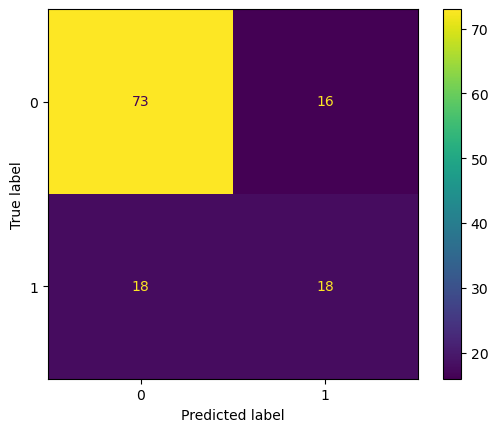

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# grid search for naive bayes

In [34]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_nb = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
nb_model = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search_nb.fit(X_train_scaled, y_train)

best_nb = grid_search_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test_scaled)
result['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Classification Report': classification_report(y_test, y_pred_nb, output_dict=True),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_nb)
}
print("Best Hyperparameters for Naive Bayes:", grid_search_nb.best_params_)
y_pred_nb = grid_search_nb.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_nb))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters for Naive Bayes: {'alpha': 0.5}
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        89
           1       1.00      0.03      0.05        36

    accuracy                           0.72       125
   macro avg       0.86      0.51      0.44       125
weighted avg       0.80      0.72      0.61       125



In [35]:
y_pred = nb.predict(X_test)
for item in y_pred:
    if item ==0 :
        print("income : <=50")
    else :
        print("income : >50")
    

income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : >50
income : <=50
income : <=50
income : <=50
i

# 3 - Decision tree 🌲

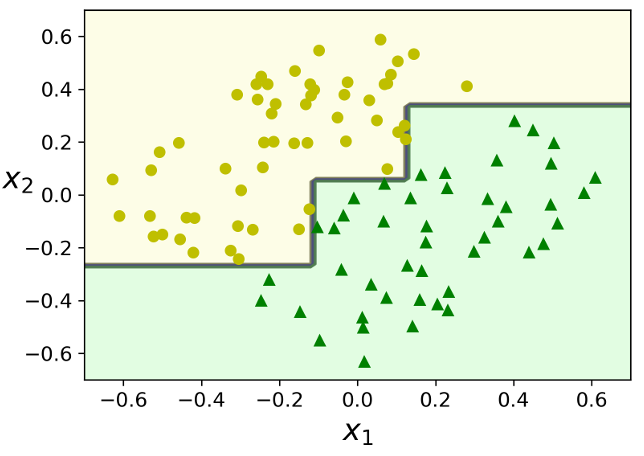

In [36]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        89
           1       0.69      0.75      0.72        36

    accuracy                           0.83       125
   macro avg       0.79      0.81      0.80       125
weighted avg       0.84      0.83      0.83       125



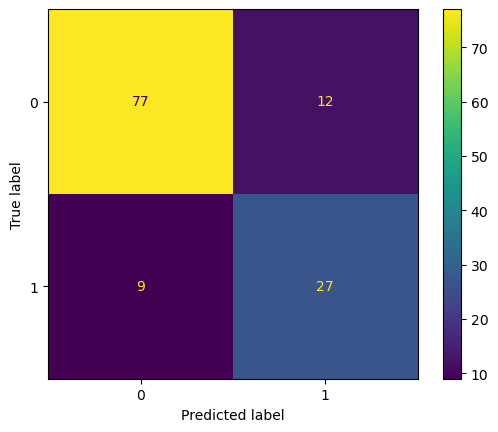

In [37]:

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


# decision tree Visualization

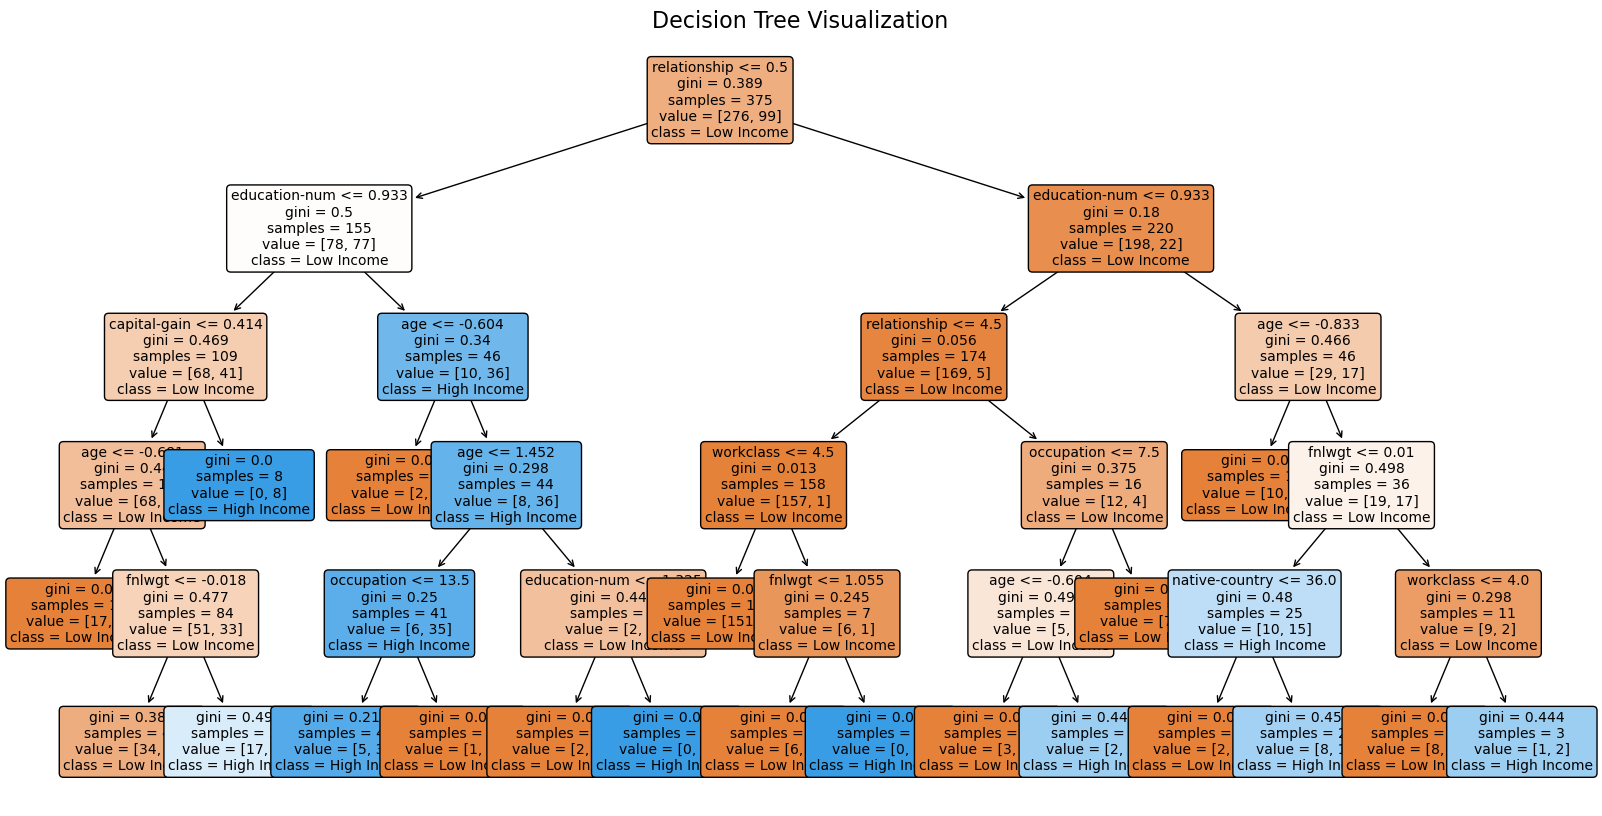

In [38]:
feature_names = X.columns.tolist()

plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier, 
    feature_names=feature_names, 
    class_names=['Low Income', 'High Income'], 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

# by using the grid search

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


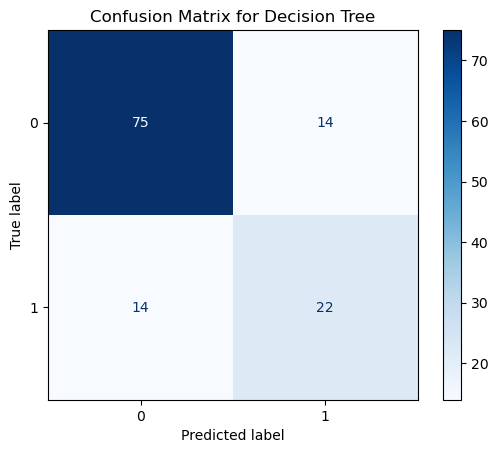

In [39]:
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

best_dt = grid_search_dt.best_estimator_
best_params = grid_search_dt.best_params_
y_pred_dt = best_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dt)

result['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Classification Report': classification_report(y_test, y_pred_dt, output_dict=True),
    'Confusion Matrix': cm
}

print("Best Hyperparameters:", best_params)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Best Hyperparameters:{'criterion':'gini','max_depth':5, 'min_samples_split': 2}
_____________
______________
______________

# by using the random search

In [40]:
param_dist = {
    'max_depth': [int(x) for x in np.linspace(5, 50, num=10)] + [None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'gini'}


Test Accuracy: 0.8160
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        89
           1       0.76      0.53      0.62        36

    accuracy                           0.82       125
   macro avg       0.79      0.73      0.75       125
weighted avg       0.81      0.82      0.80       125

Confusion Matrix:
 [[83  6]
 [17 19]]


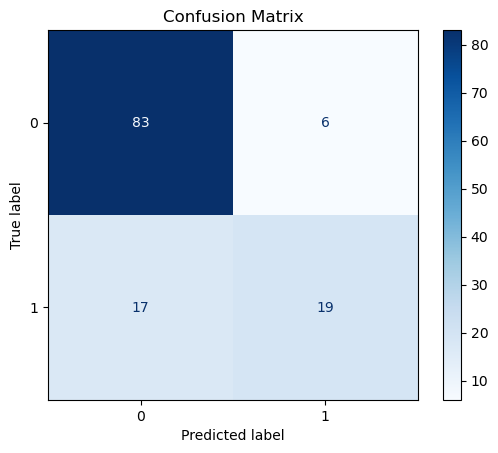

In [41]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [42]:
y_pred = nb.predict(X_test)
for item in y_pred:
    if item ==0 :
        print("income : <=50")
    else :
        print("income : >50")

income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : >50
income : <=50
income : <=50
income : <=50
i

# extra ( radnom forest )

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Test Accuracy: 0.8480
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        89
           1       0.81      0.61      0.70        36

    accuracy                           0.85       125
   macro avg       0.84      0.78      0.80       125
weighted avg       0.84      0.85      0.84       125



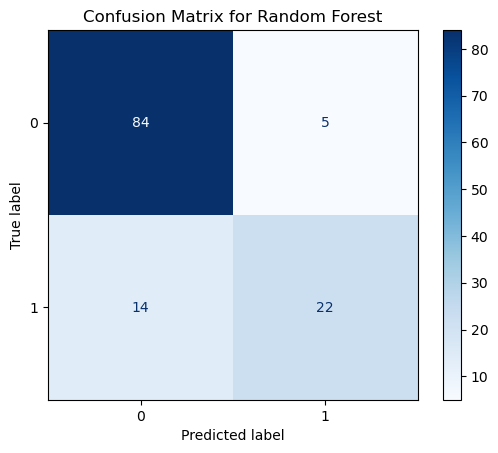

In [43]:
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 150],         
    'max_depth': [5, 10, None],            
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'criterion': ['gini', 'entropy']      
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_
print(f"Best Hyperparameters: {best_params_rf}")

y_pred_rf = best_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {accuracy_rf:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

accuracy : 0.8480

_________________
___________________
_____________
# SVM 🏗️

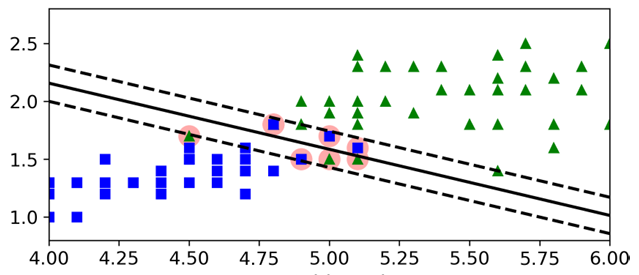



# 4.1 linear svm

In [44]:
for i in range(1,10,2):
    linear_svm = SVC(kernel='linear', C=i)
    linear_svm.fit(X_train, y_train)

    y_pred_linear = linear_svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_linear)
    print("Linear Kernel Accuracy:", accuracy)

Linear Kernel Accuracy: 0.792
Linear Kernel Accuracy: 0.792
Linear Kernel Accuracy: 0.792
Linear Kernel Accuracy: 0.792
Linear Kernel Accuracy: 0.792


# 4.2 Polynomial svm

In [45]:
poly_svm = SVC(kernel='poly', degree=3, C=1)
poly_svm.fit(X_train, y_train)

y_pred_poly = poly_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_poly)
print("Polynomial Kernel Accuracy:", accuracy)

Polynomial Kernel Accuracy: 0.712


# 4.3 RBF svm

In [46]:
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.1)
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rbf)
print("RBF Kernel Accuracy:", accuracy)

RBF Kernel Accuracy: 0.776


# 4.4 Sigmoid svm

In [47]:
sigmoid_svm = SVC(kernel='sigmoid', C=1, gamma=0.1)
sigmoid_svm.fit(X_train, y_train)

y_pred_sigmoid = sigmoid_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sigmoid)
print("Sigmoid Kernel Accuracy:", accuracy)

Sigmoid Kernel Accuracy: 0.712


# grid search for SVM

In [48]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],           
    'gamma': ['scale', 'auto', 0.1, 1],  
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [3, 4, 5],                
}

svm = SVC()

grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, verbose=2, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_

y_pred_svm = best_svm.predict(X_test)

result['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Classification Report': classification_report(y_test, y_pred_svm, output_dict=True),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_svm)
}

print("Best Hyperparameters from Grid Search:", grid_search_svm.best_params_)
print("Performance with Best Hyperparameters (Grid Search):")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Confusion Matrix for SVM:\n{cm_svm}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters from Grid Search: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Performance with Best Hyperparameters (Grid Search):
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        89
           1       0.81      0.36      0.50        36

    accuracy                           0.79       125
   macro avg       0.80      0.66      0.68       125
weighted avg       0.80      0.79      0.76       125

Confusion Matrix for SVM:
[[86  3]
 [23 13]]


# random search for svm

In [49]:
param_dist = {
    'C': np.logspace(-2, 2, 5),          
    'gamma': ['scale', 'auto', 0.1, 1],  
    'kernel': ['linear', 'poly', 'rbf'],  
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Hyperparameters from Randomized Search:", random_search.best_params_)

best_svm_random = random_search.best_estimator_
y_pred_random = best_svm_random.predict(X_test)
print("Performance with Best Hyperparameters (Randomized Search):")
print(classification_report(y_test, y_pred_random))

Best Hyperparameters from Randomized Search: {'kernel': 'linear', 'gamma': 1, 'C': 1.0}
Performance with Best Hyperparameters (Randomized Search):
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        89
           1       0.81      0.36      0.50        36

    accuracy                           0.79       125
   macro avg       0.80      0.66      0.68       125
weighted avg       0.80      0.79      0.76       125



# testing set for predictions. 


In [50]:
y_pred = nb.predict(X_test)
for item in y_pred:
    if item ==0 :
        print("income : <=50")
    else :
        print("income : >50")

income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : <=50
income : <=50
income : <=50
income : <=50
income : >50
income : >50
income : <=50
income : <=50
income : <=50
i

# Comparative Analysis  🚨🚨🚨🚨


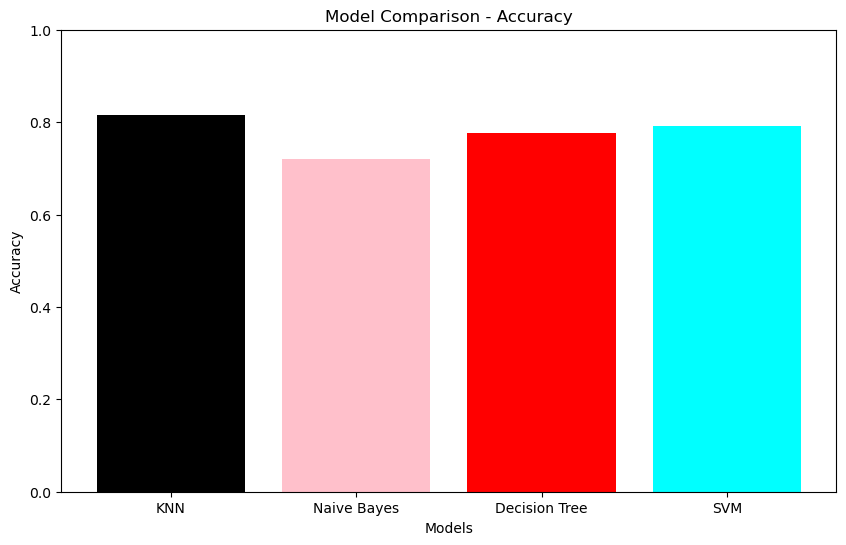

{
    "KNN": {
        "Classification Report": {
            "0": {
                "precision": 0.8113207547169812,
                "recall": 0.9662921348314607,
                "f1-score": 0.882051282051282,
                "support": 89.0
            },
            "1": {
                "precision": 0.8421052631578947,
                "recall": 0.4444444444444444,
                "f1-score": 0.5818181818181818,
                "support": 36.0
            },
            "accuracy": 0.816,
            "macro avg": {
                "precision": 0.8267130089374379,
                "recall": 0.7053682896379525,
                "f1-score": 0.7319347319347319,
                "support": 125.0
            },
            "weighted avg": {
                "precision": 0.8201866931479642,
                "recall": 0.816,
                "f1-score": 0.7955841491841491,
                "support": 125.0
            }
        }
    },
    "Naive Bayes": {
        "Classification Report": {
    

In [51]:
models = list(result.keys())
accuracies = [result[model]['Accuracy'] for model in models]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['black', 'pink', 'red', 'cyan'])
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.show()

output = {}
for model in result:
    output[model] = {
        "Classification Report": result[model]['Classification Report']
    }

json_output = json.dumps(output, indent=4)

print(json_output)

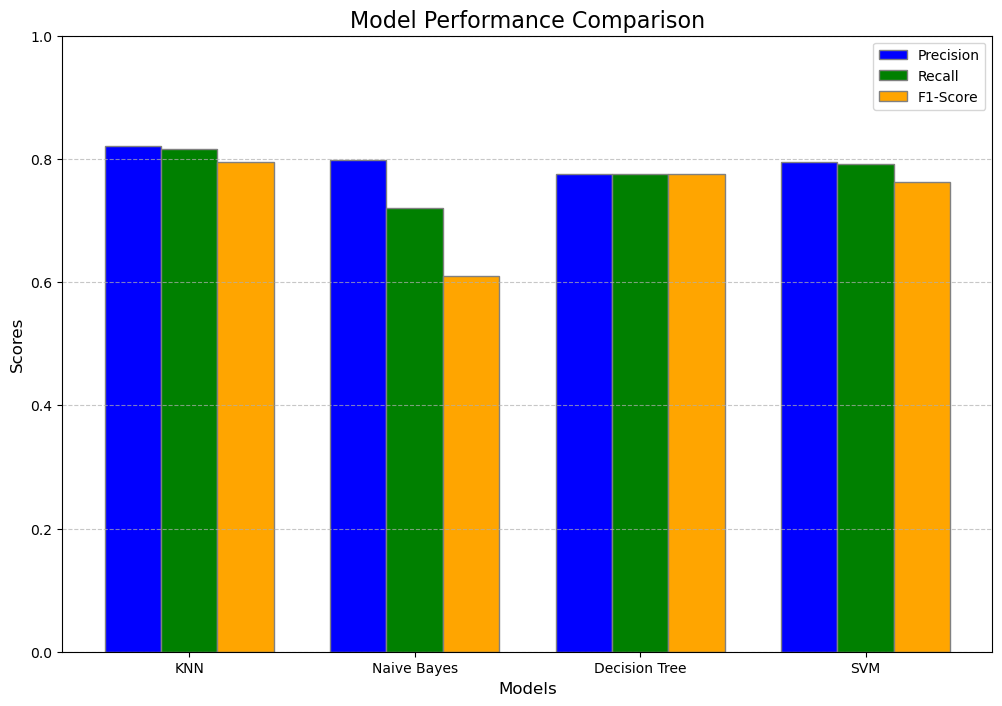

In [52]:
models = list(result.keys())
precision = [result[model]['Classification Report']['weighted avg']['precision'] for model in models]
recall = [result[model]['Classification Report']['weighted avg']['recall'] for model in models]
f1_score = [result[model]['Classification Report']['weighted avg']['f1-score'] for model in models]

bar_width = 0.25
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(12, 8))
plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='orange', width=bar_width, edgecolor='grey', label='F1-Score')

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylim(0, 1)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

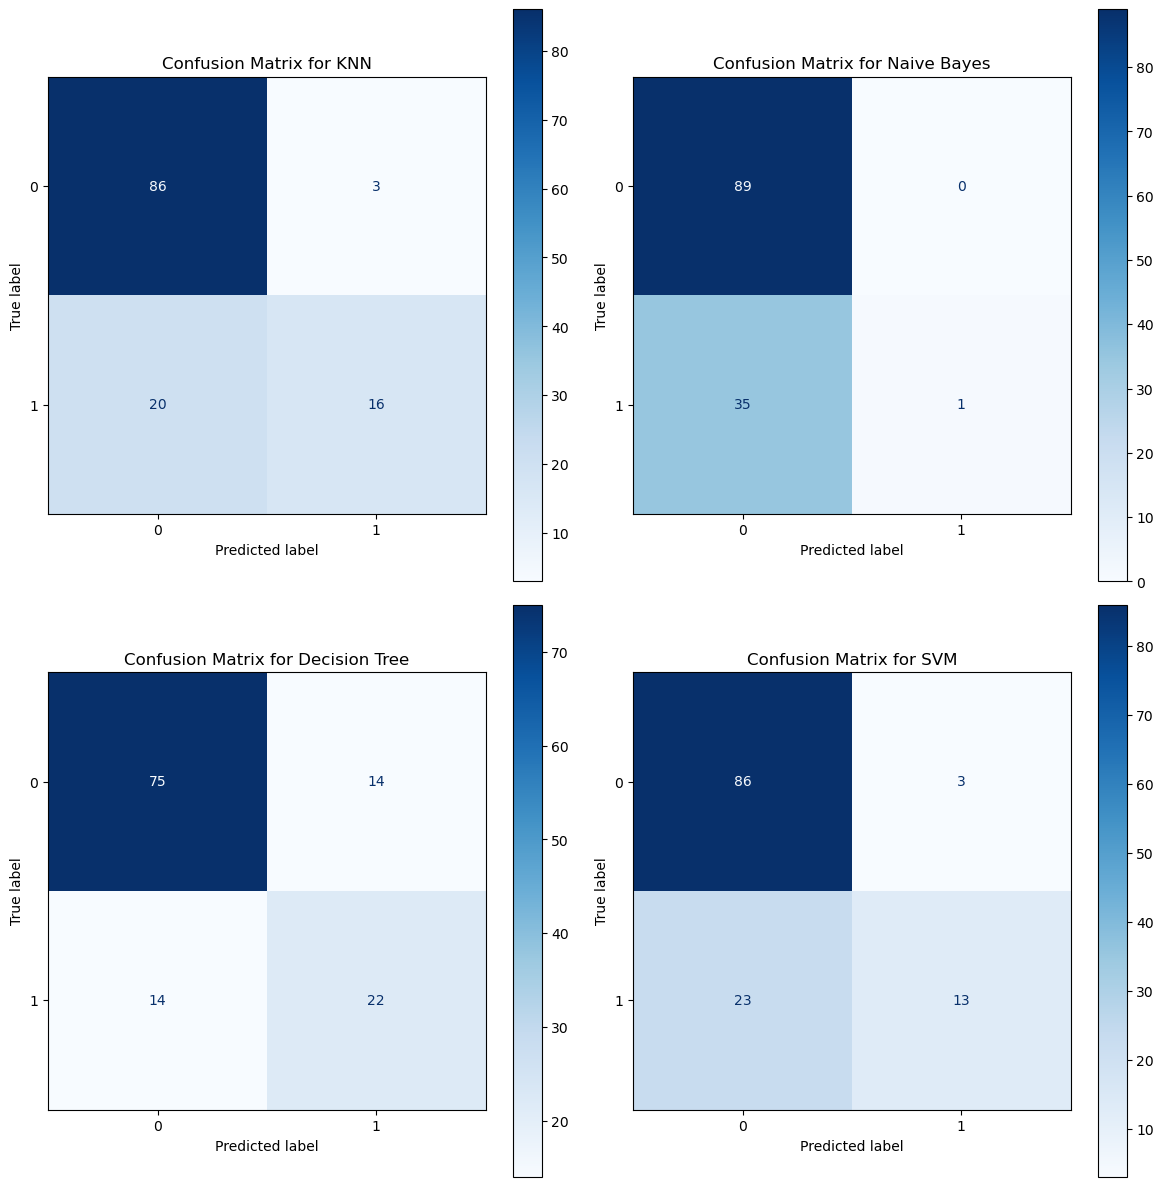

In [53]:
n_models = len(result)
n_cols = 2  
n_rows = (n_models + 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()  

for i, model in enumerate(result):
    cm = result[model]['Confusion Matrix']
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {model}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

# Model Performance Insights 🏎️

### 1. **K-Nearest Neighbors (KNN)**

- **Accuracy:** 81.6%
- **Precision for Class 1:** 0.84, **Recall for Class 1:** 0.44
- **Macro Average:** 
  - Precision: 0.83 
  - Recall: 0.71 
  - F1-Score: 0.73
- **Weighted Average:** 
  - Precision: 0.82 
  - Recall: 0.82 
  - F1-Score: 0.80

**Strengths:**
- High precision for both classes, especially for Class 1.
- Balanced macro-average precision and recall, suggesting good overall performance across classes.

**Weaknesses:**
- Low recall for Class 1 (44%), meaning many positive instances are missed.

---

### 2. **Naive Bayes**

- **Accuracy:** 72%
- **Precision for Class 1:** 1.0, **Recall for Class 1:** 0.03
- **Macro Average:**
  - Precision: 0.86 
  - Recall: 0.51 
  - F1-Score: 0.44
- **Weighted Average:** 
  - Precision: 0.80 
  - Recall: 0.72 
  - F1-Score: 0.61

**Strengths:**
- Perfect precision for Class 1, meaning it makes correct predictions when it predicts Class 1.

**Weaknesses:**
- Very low recall for Class 1 (only 2.78%), missing most positive cases.
- Overall performance (accuracy, f1-score) is lower compared to other models.

---

### 3. **Decision Tree**

- **Accuracy:** 77.6%
- **Precision for Class 1:** 0.61, **Recall for Class 1:** 0.61
- **Macro Average:**
  - Precision: 0.73 
  - Recall: 0.73 
  - F1-Score: 0.73
- **Weighted Average:** 
  - Precision: 0.78 
  - Recall: 0.78 
  - F1-Score: 0.78

**Strengths:**
- Balanced precision, recall, and f1-score for both classes.
- High interpretability due to the tree structure.

**Weaknesses:**
- Lower precision and recall for Class 1 compared to KNN and SVM.
- Potential for overfitting with a complex tree structure.

---

### 4. **Support Vector Machine (SVM)**

- **Accuracy:** 79.2%
- **Precision for Class 1:** 0.81, **Recall for Class 1:** 0.36
- **Macro Average:**
  - Precision: 0.80 
  - Recall: 0.66 
  - F1-Score: 0.68
- **Weighted Average:** 
  - Precision: 0.80 
  - Recall: 0.79 
  - F1-Score: 0.76

**Strengths:**
- Strong precision for Class 1 (0.81), indicating accurate predictions for Class 1.
- Better macro-average F1-score than Naive Bayes and Decision Tree.

**Weaknesses:**
- Moderate recall for Class 1 (36%), missing some positive class instances.
- Higher training time for larger datasets or non-linear kernels.

---

### **Conclusion:**

- **Best Performance: KNN**  
  KNN achieves the highest accuracy (81.6%) with a balanced macro-average precision and recall. Despite having a lower recall for Class 1, it performs well overall in handling both classes.

- **Second Place: SVM**  
  SVM performs well, with strong precision for Class 1, but its moderate recall for Class 1 makes it less effective than KNN.

- **Third Place: Decision Tree**  
  Decision Tree is balanced across both classes, but its lower performance for Class 1 (both precision and recall) places it below KNN and SVM.

- **Last Place: Naive Bayes**  
  Naive Bayes has high precision for Class 1 but very low recall, resulting in poor overall performance.

Thus, **KNN** is the most effective model for this prediction task.
